In [21]:
import nltk
from nltk import word_tokenize, sent_tokenize # for tokenization
import gensim # for word2vec
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE #
import pandas as pd # dataframe preprocessing
from bokeh.io import output_notebook # visualization
from bokeh.plotting import show, figure # visualization
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
nltk.download('punkt') # English-language sentence tokenizer (not all periods end sentences; not all sentences start with a capital letter)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Loading Data

In [5]:
nltk.download("gutenberg")

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [6]:
from nltk.corpus import gutenberg

In [8]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [7]:
len(gutenberg.fileids())

18

Tokenizing Data

In [9]:
# proper method 
gberg_sent_tokens = sent_tokenize(gutenberg.raw())

In [12]:
gberg_sent_tokens[0:3] # breaking sentences

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.',
 "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.",
 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.']

In [13]:
gberg_sent_tokens[1] # break this into words

"She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."

In [14]:
word_tokenize(gberg_sent_tokens[1])

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [15]:
# convinent way for this corups
gberg_sent = gutenberg.sents()

In [17]:
gberg_sent[3]

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence',
 ';',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty',
 '-',
 'one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 '.']

Training model using gensim word2vec and saving it 

In [18]:
# use skig grams for small datasets and window is 10 -- 20 context words to predict the tagret word , minimum count is the words with min count of 5 will be considered only
model = Word2Vec(sentences=gberg_sent,size=64,seed=5,sg=1,window=10,workers=8,min_count=5)
model.save("gutenberg_w2v_model")

In [22]:
model['dog']

array([-0.31193793, -0.13475282, -0.1849526 ,  0.32564124,  0.06501974,
       -0.03861444, -0.34069937, -0.02339234,  0.04092365, -0.20192075,
       -0.5022932 ,  0.25704122,  0.11565794,  0.04239773,  0.0407548 ,
        0.0805219 ,  0.28682065, -0.11829311, -0.2533827 ,  0.05524458,
        0.2502008 ,  0.25996965,  0.44144052,  0.028815  , -0.31257433,
       -0.44279698,  0.2519901 , -0.58418185, -0.10691172,  0.13452691,
        0.24961571, -0.22808005, -0.43236938, -0.16442902,  0.23752044,
       -0.19956303,  0.05578632,  0.13324276, -0.46458015,  0.17314132,
        0.24139166, -0.26765993,  0.41321918,  0.6687299 ,  0.07409037,
        0.53537875,  0.39778093, -0.4011445 , -0.03426015,  0.08714264,
        0.4273963 ,  0.24408194,  0.63668114, -0.19519177, -0.1257533 ,
        0.09601929, -0.6697892 ,  0.39678472,  0.04085674, -0.05562268,
       -0.29281753, -0.05907733, -0.26503268, -0.46096027], dtype=float32)

In [24]:
print(model["dog"].shape) # 64 dimension 1-d array
print(type(model["dog"])) # numpy array to be precise

(64,)
<class 'numpy.ndarray'>


In [25]:
model.most_similar('dog') # distance

[('puppy', 0.8437073230743408),
 ('sweeper', 0.7858336567878723),
 ('thief', 0.7682982087135315),
 ('cow', 0.7642086744308472),
 ('Truck', 0.7627134323120117),
 ('chimney', 0.761603057384491),
 ('butcher', 0.7606023550033569),
 ('broth', 0.75969398021698),
 ('pig', 0.7562854290008545),
 ('pet', 0.7547144889831543)]

In [26]:
model.most_similar('think')

[('suppose', 0.8455615043640137),
 ('contradict', 0.833499014377594),
 ('manage', 0.8229176998138428),
 ('Mamma', 0.8131434321403503),
 ('believe', 0.8118674755096436),
 ('really', 0.8102105855941772),
 ('understand', 0.805797815322876),
 ('interfere', 0.805609941482544),
 ('know', 0.8016046285629272),
 ('_you_', 0.8011937141418457)]

In [27]:
model.most_similar('moon')

[('sun', 0.8447699546813965),
 ('stars', 0.8411847352981567),
 ('clouds', 0.8364265561103821),
 ('star', 0.8153719305992126),
 ('darkened', 0.8033206462860107),
 ('morn', 0.7989192008972168),
 ('shineth', 0.7951984405517578),
 ('dew', 0.7933613061904907),
 ('light', 0.7929078340530396),
 ('sky', 0.7908841371536255)]

In [28]:
model.most_similar('day')

[('night', 0.7773570418357849),
 ('morning', 0.7510035037994385),
 ('month', 0.7185819149017334),
 ('time', 0.7031509280204773),
 ('evening', 0.6959633231163025),
 ('week', 0.6856201887130737),
 ('Adar', 0.6634006500244141),
 ('fourteenth', 0.6605393290519714),
 ('Saturday', 0.6597697734832764),
 ('Abib', 0.6558685302734375)]

In [29]:
model.most_similar('father')

[('brother', 0.8716245293617249),
 ('mother', 0.8493326902389526),
 ('wife', 0.802148699760437),
 ('sister', 0.7890634536743164),
 ('daughter', 0.762332558631897),
 ('Amnon', 0.7589593529701233),
 ('uncle', 0.7564589977264404),
 ('Tamar', 0.7434445023536682),
 ('servant', 0.7378741502761841),
 ('bondwoman', 0.7330065965652466)]

In [30]:
model.doesnt_match("mother father daughter dog".split()) # pick odd one out

'dog'

In [33]:
# close but no so well -- trying more examples
model.most_similar(positive=['brother', 'woman'], negative=['man'])

[('wife', 0.8514582514762878),
 ('husband', 0.787704348564148),
 ('daughter', 0.7855356335639954),
 ('sister', 0.7692149877548218),
 ('daughters', 0.7376797199249268),
 ('mother', 0.7252870798110962),
 ('Tamar', 0.7088609337806702),
 ('Amnon', 0.7032572031021118),
 ('father', 0.7030072212219238),
 ('Sarai', 0.7003660798072815)]

In [34]:
# more confident about this one: 
model.most_similar(positive=['son', 'woman'], negative=['man'])

[('wife', 0.7637921571731567),
 ('daughter', 0.7519233822822571),
 ('conceived', 0.7114080190658569),
 ('Jephunneh', 0.7056716084480286),
 ('Hittite', 0.6907368898391724),
 ('Nahor', 0.6898621320724487),
 ('Bethuel', 0.6882817149162292),
 ('Hagar', 0.6878611445426941),
 ('Leah', 0.6877326965332031),
 ('Bilhah', 0.6874154806137085)]

In [35]:
model.most_similar(positive=['husband', 'woman'], negative=['man'])

[('wife', 0.7666338682174683),
 ('sister', 0.717877984046936),
 ('daughter', 0.6979228258132935),
 ('mother', 0.67671799659729),
 ('conceived', 0.6658602952957153),
 ('nurse', 0.6612200736999512),
 ('widow', 0.6571099758148193),
 ('daughters', 0.6506186127662659),
 ('child', 0.6372405290603638),
 ('married', 0.6319568753242493)]

impressive for such a small data set, without any cleaning, e.g., to lower case (covered next)

Vizualizations : 

In [36]:
# we can't possibly visualize 64 dimensional data -- we t-SNE algorthim for dimensionality reduction|

t-Distributed Stochastic Neighbor Embedding is a non-linear dimensionality reduction algorithm used for exploring high-dimensional data. It maps multi-dimensional data to two or more dimensions suitable for human observation.

In [37]:
len(model.wv.vocab) # number of words that are in the word2vec

17011

In [38]:
X = model[model.wv.vocab] # representation of all the words
print(X.shape) # sanity check

(17011, 64)


In [39]:
tsne = TSNE(n_components=2, n_iter=1000) # 200 is minimum iter; default is 1000

In [40]:
X_2d = tsne.fit_transform(X)

In [41]:
print(X_2d.shape)

(17011, 2)


In [42]:
coords_df = pd.DataFrame(X_2d, columns=['x','y'])
coords_df['token'] = model.wv.vocab.keys()
coords_df.head()

,x,y,token
0,-7.825037,-57.617886,[
1,-63.032276,-6.587792,Emma
2,-32.034481,27.169979,by
3,-63.023048,-5.362987,Jane
4,-7.862325,-57.570358,]


In [43]:
coords_df.to_csv('raw_gutenberg_tsne.csv', index=False) # saving in the csv file just in case 

In [44]:
coords_df = pd.read_csv('raw_gutenberg_tsne.csv') # for second run

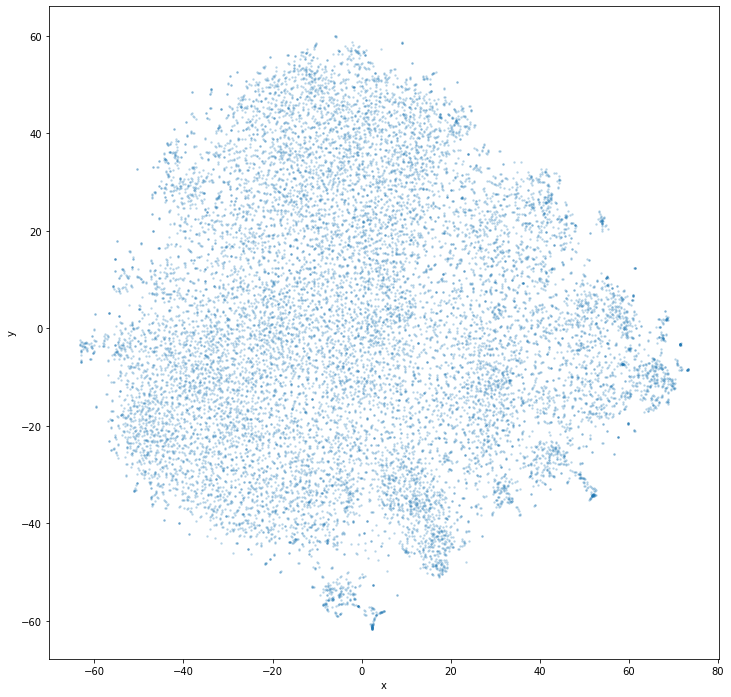

In [45]:
_ = coords_df.plot.scatter('x', 'y', figsize=(12,12), marker='.', s=10, alpha=0.2)

In [46]:
output_notebook() # output bokeh plots inline in notebook

In [48]:
subset_df = coords_df.sample(n=5000) # sample 5000 points only

In [49]:
p = figure(plot_width=800, plot_height=800)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)

In [51]:
show(p)